In [21]:
import numpy as np
from Init_det_glrt import Init_det_glrt
from func_loaddataset import func_loaddataset
from utils import *
from RTINS import *

In [22]:
file_path = "D:\\USERS\\Exeter\\Courses\\MSC Project\\code\\zuptv3\\imu_data.csv_3.csv"
data = np.loadtxt(file_path, delimiter=',').T

In [23]:
data.shape

(6, 1399)

In [24]:
u = func_loaddataset('./data_inert.txt')

In [25]:
simdata = Init_det_glrt()
# Variables for calculating the performance
D = len(simdata['data_sets'])
Jadapt = 0
Jadapt_all = np.zeros((D, 3))
gamma_vec = np.logspace(4, 6, 20)
M = len(gamma_vec)
ctr = 1
Niter = M
Jfixed = np.zeros(M)
Jfixed_all = np.zeros((M, D, 3))

ins = INS(simdata)

In [26]:
zupt , logL = ins.detector_adaptive(u)
x_h, _, _, _ = ins.baseline(u, zupt, logL, True)

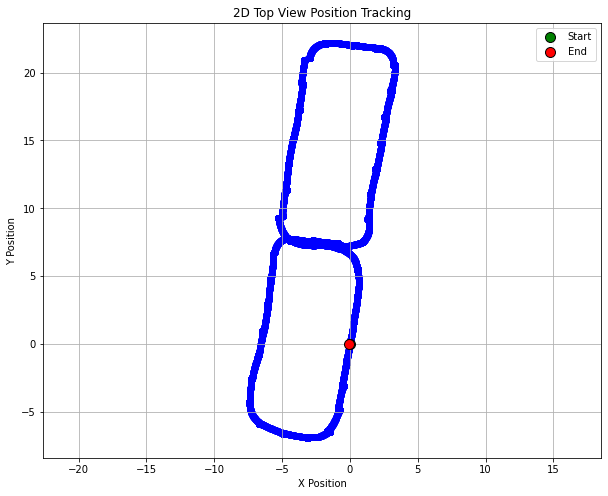

In [27]:
plot_position_tracking(x_h)

logL (1, 1399) gamma (1399,)


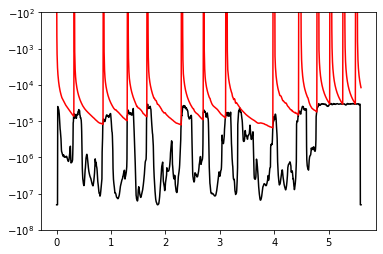

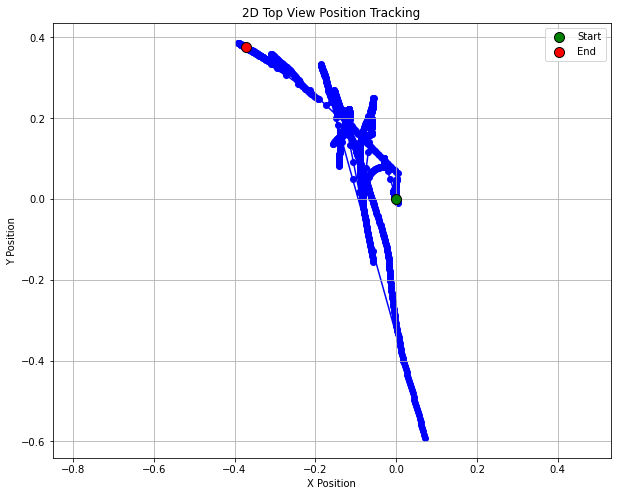

In [28]:
zupt , logL = ins.detector_adaptive(data)
x_h, _, _, _ = ins.baseline2(data, zupt, logL, True)
plot_position_tracking(x_h)

In [29]:
position = []
n = 250
num_batches = len(data[0]) // n
init_x = None
init_quat = None
init_P = None
for i in range(num_batches+1):
    # print(i)
    ui = data[:, i*n:(i+1)*n]
    zupt , logL = ins.detector_adaptive(ui)
    x_h, _, quat, P = ins.baseline(ui, zupt, logL, True, init_x, init_quat, init_P) # 9, N
    init_x, init_quat, init_P = x_h[:,-1], quat, P
    for j in range(len(x_h[0])):
        x,y,z = x_h[:3,j]
        position.append([x, y, z])
    break
    

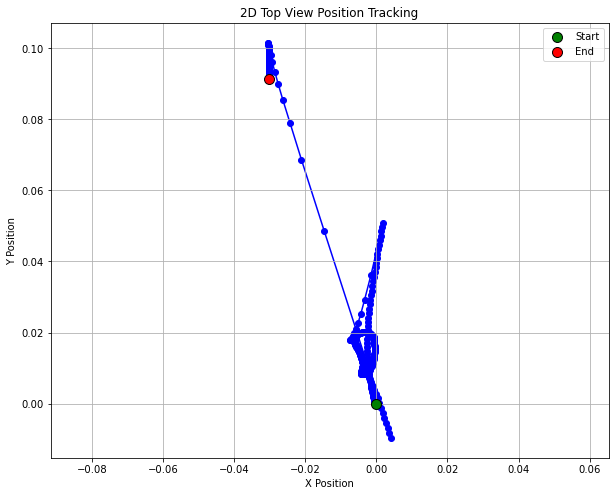

In [30]:
p = np.array(position)
xs = p[:,0]
ys = p[:,1]
# Create the plot
plt.figure(figsize=(10, 8))
plt.plot(xs, ys, marker='o', linestyle='-', color='b', zorder=1)
plt.title('2D Top View Position Tracking')
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.grid(True)
plt.axis('equal')  # This ensures that unit increments are equal on both axes

# Highlight the first position with higher zorder
plt.scatter(xs[0], ys[0], color='green', s=100, edgecolor='black', label='Start', zorder=2)
# Highlight the last position with higher zorder
plt.scatter(xs[-1], ys[-1], color='red', s=100, edgecolor='black', label='End', zorder=2)

# Add a legend to identify the start and end
plt.legend()

# Display the plot
plt.show()

In [31]:
position = []

In [32]:
u1 = u[:, :6000]
u2 = u[:, 6000:12000]
u3 = u[:, 8000:12000]


logL (1, 6000) gamma (6000,)


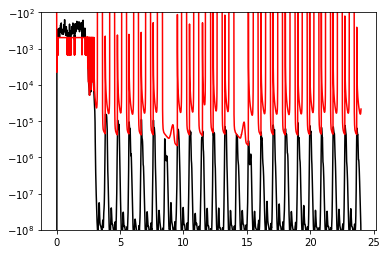

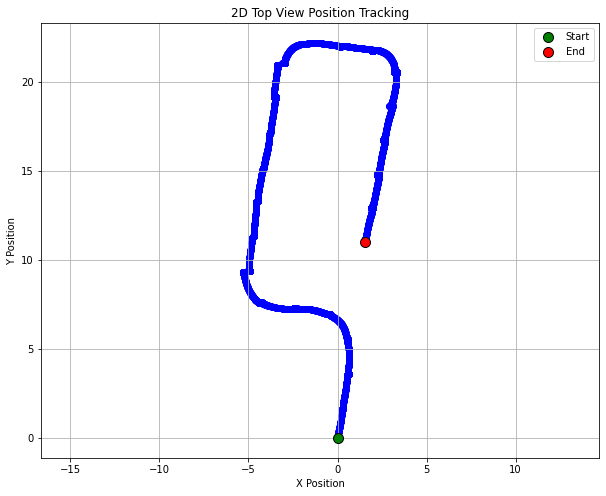

In [33]:
zupt , logL = ins.detector_adaptive(u1)
x_h, _, quat, P = ins.baseline2(u1, zupt, logL, True)
plot_position_tracking(x_h)

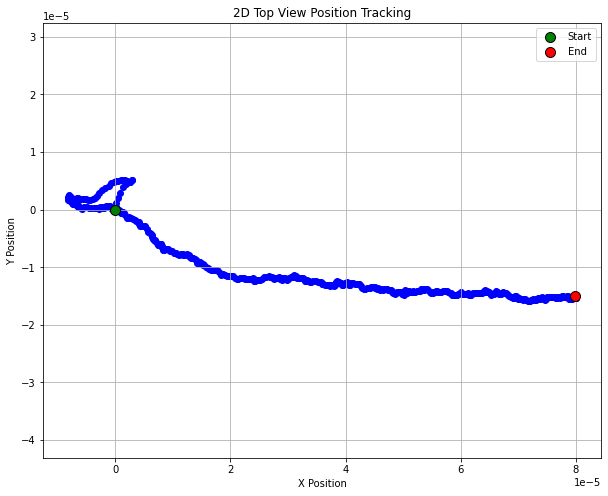

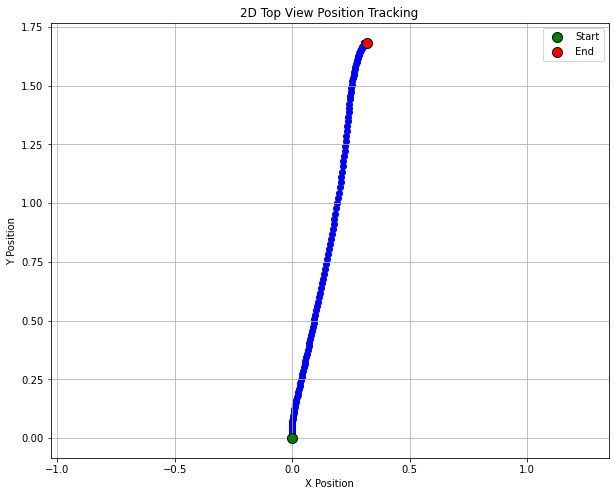

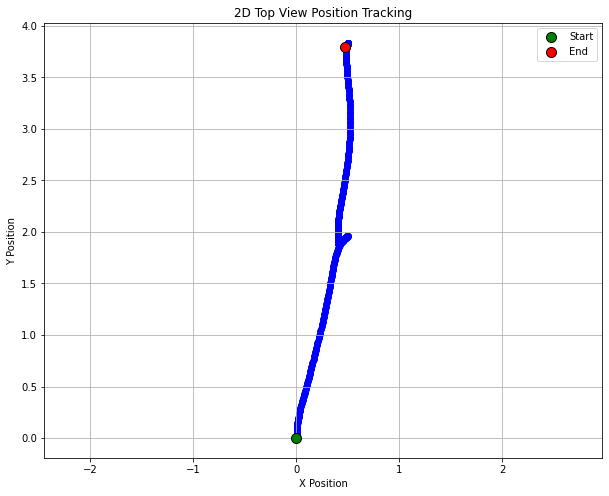

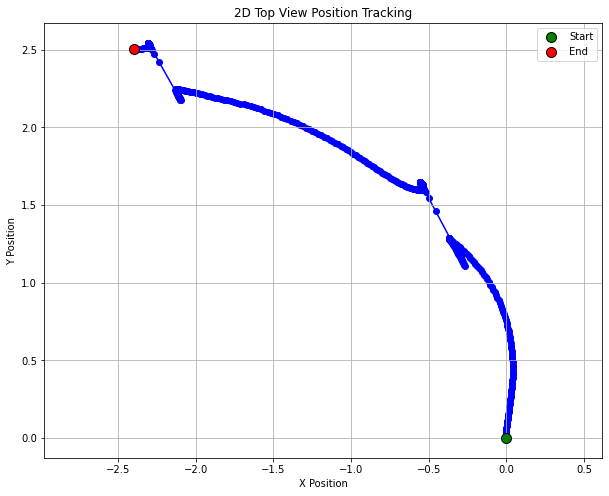

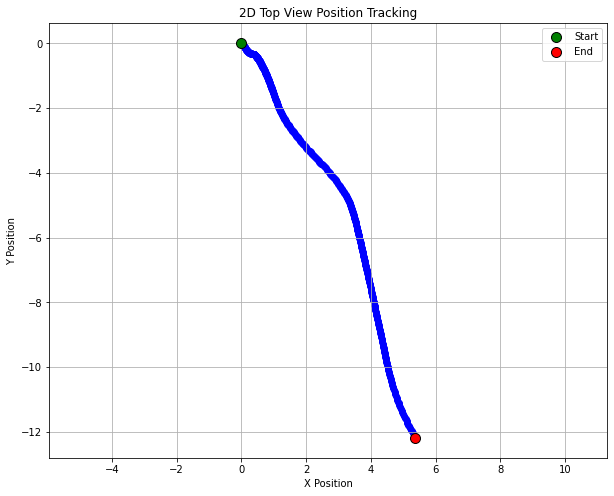

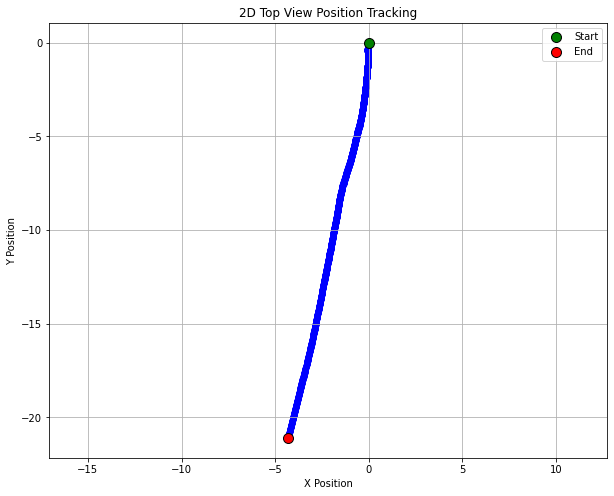

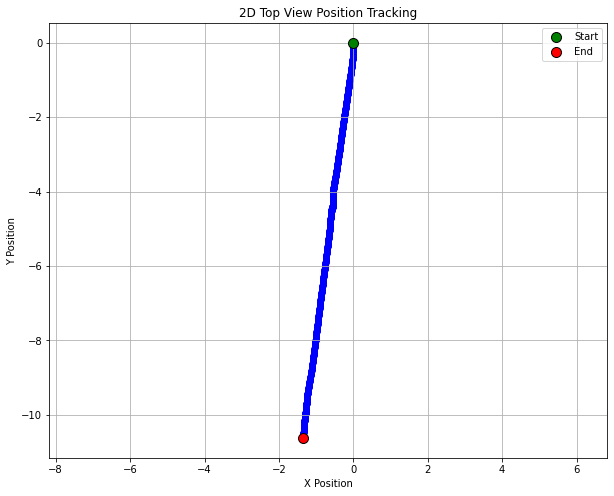

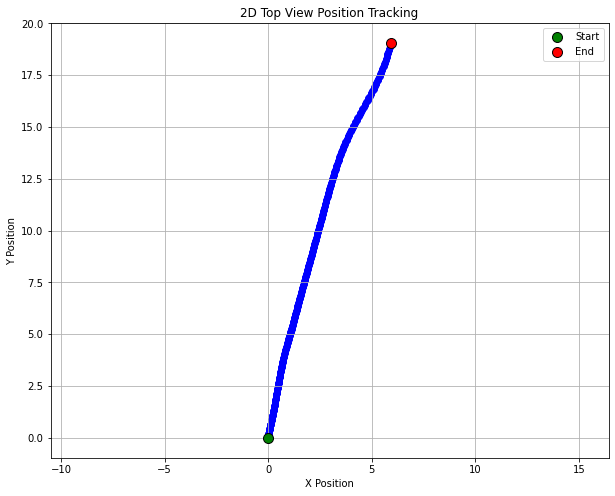

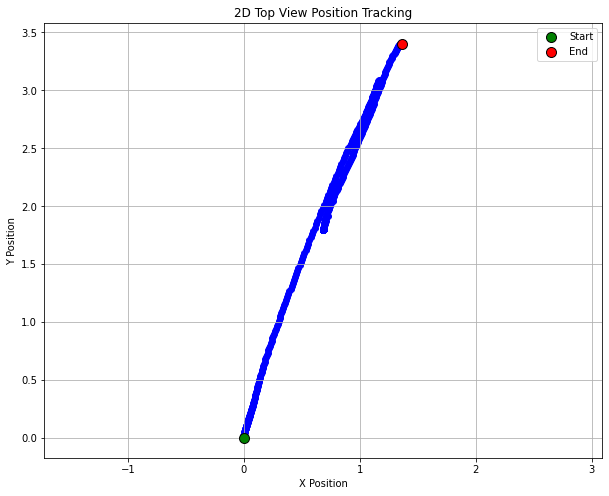

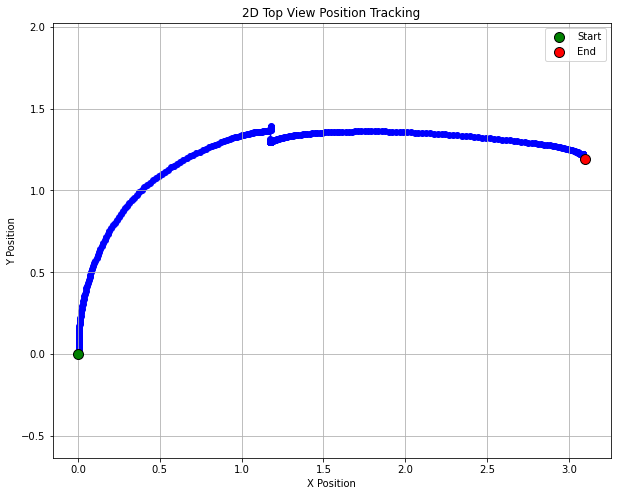

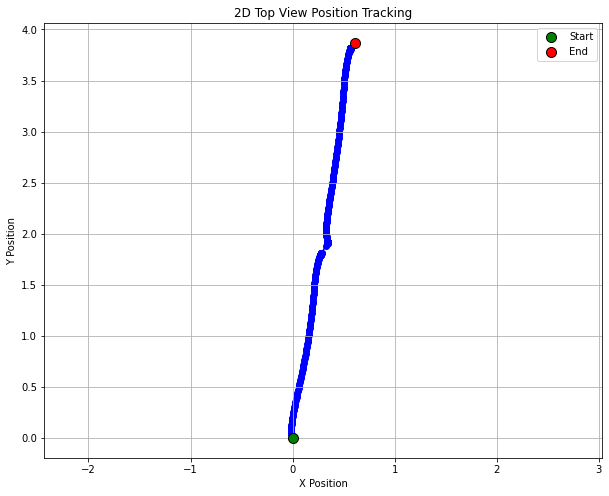

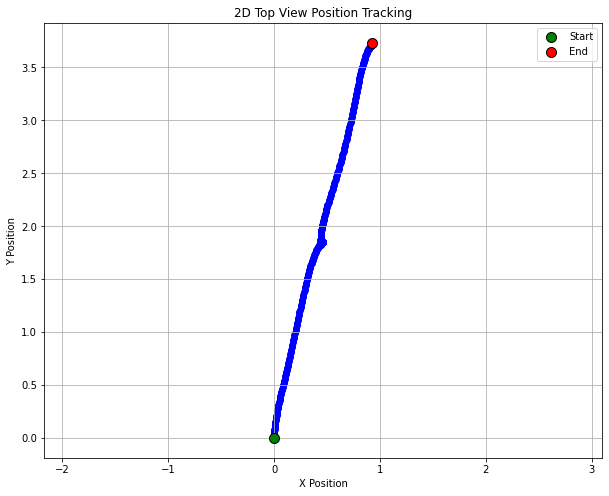

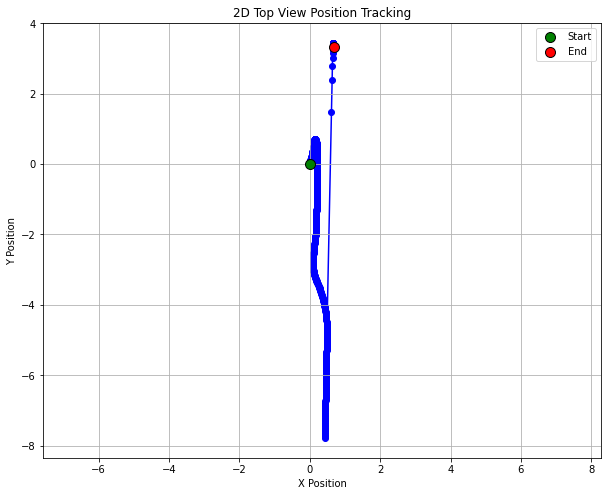

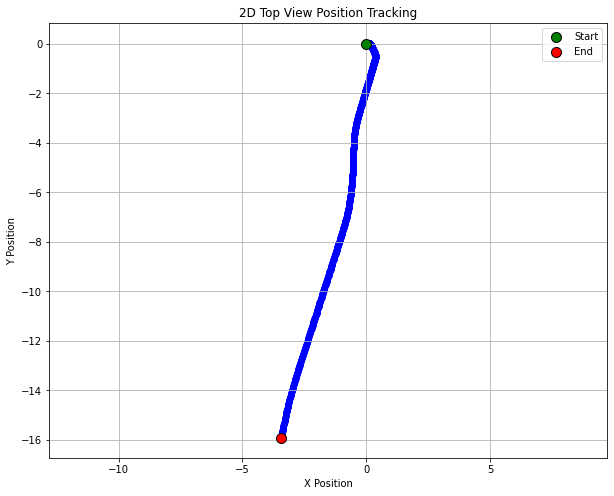

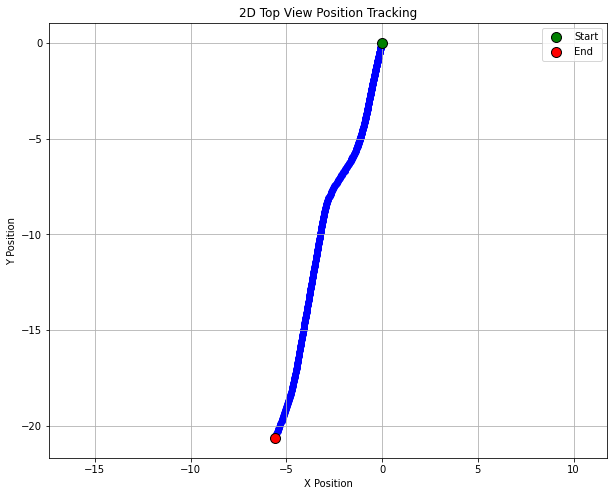

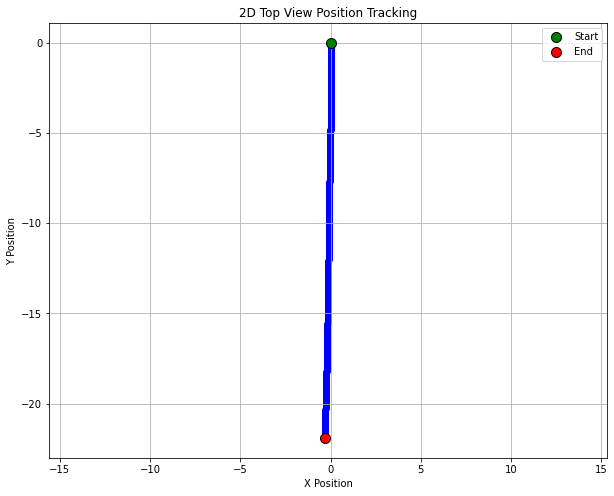

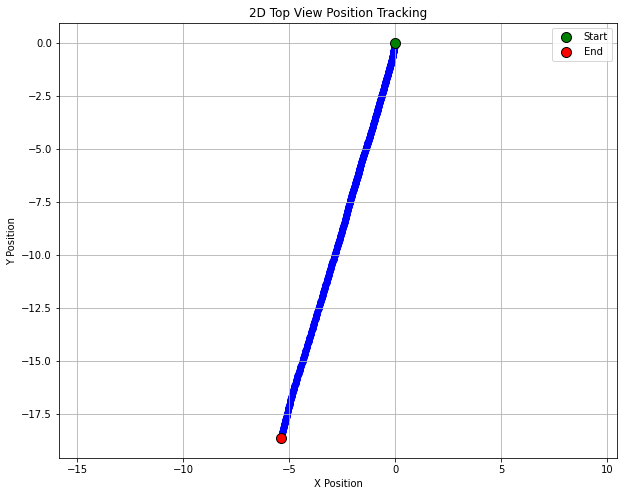

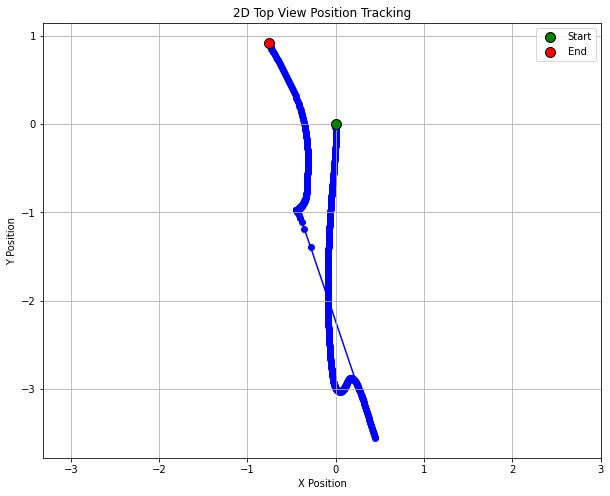

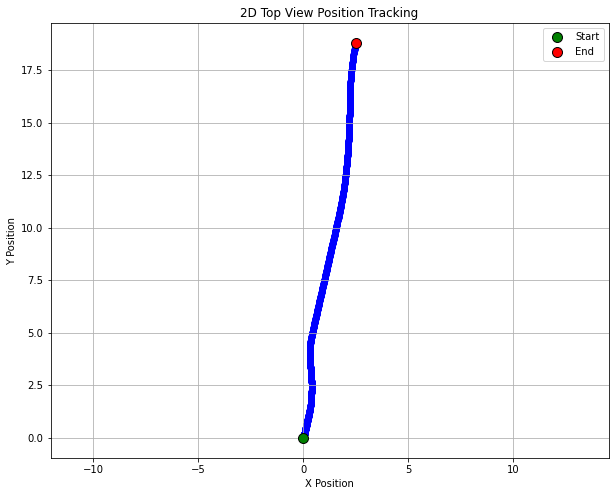

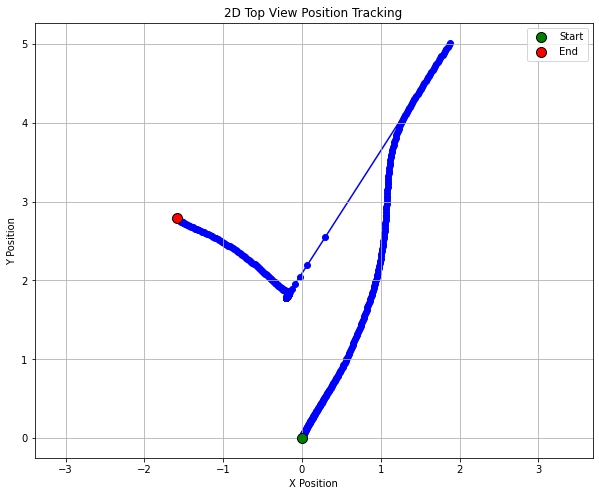

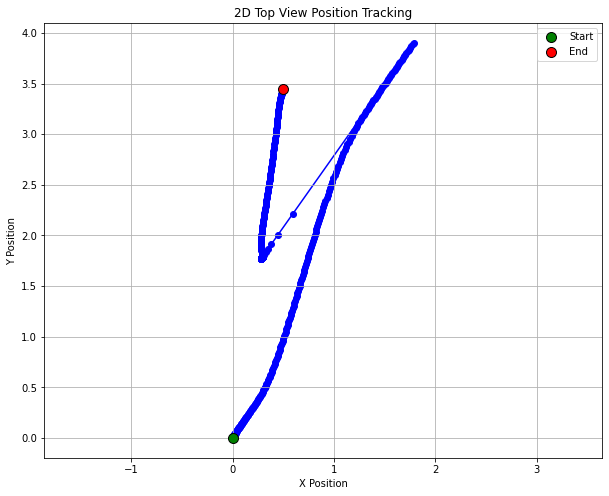

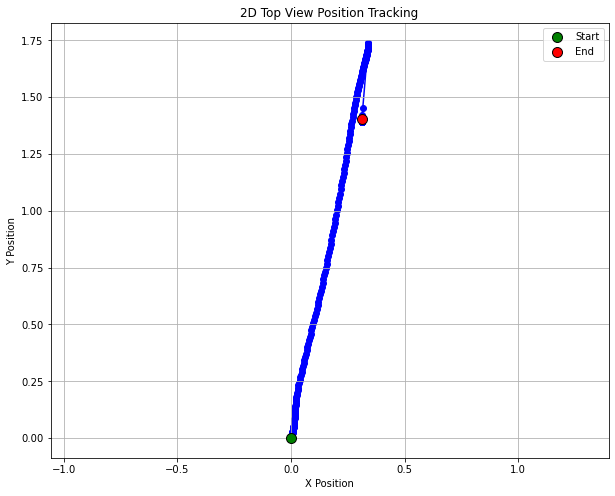

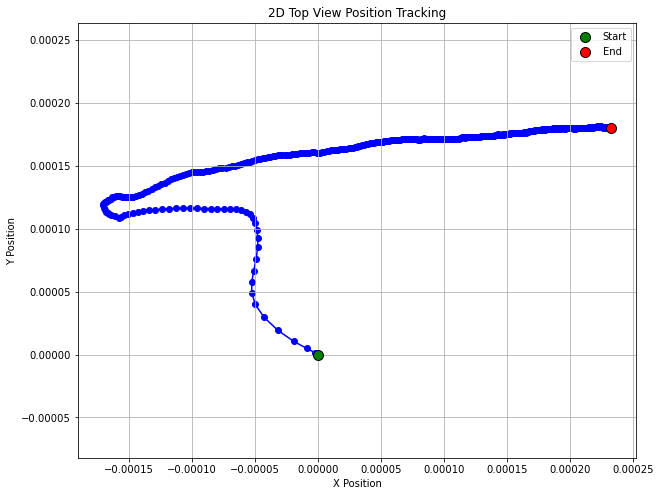

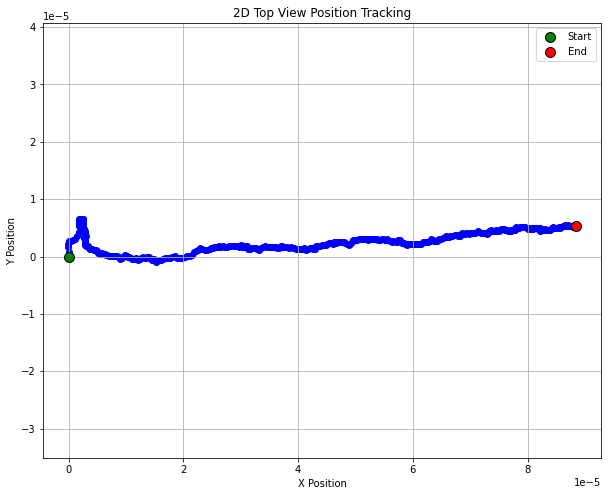

In [34]:
position = []
n = 500
num_batches = len(u[0]) // n
init_x = None
init_quat = None
init_P = None
for i in range(num_batches+1):
    # print(i)
    ui = u[:, i*n:(i+1)*n]
    zupt , logL = ins.detector_adaptive(ui)
    x_h, _, quat, P = ins.baseline(ui, zupt, logL, True) # 9, N
    plot_position_tracking(x_h)

logL (1, 5900) gamma (5900,)


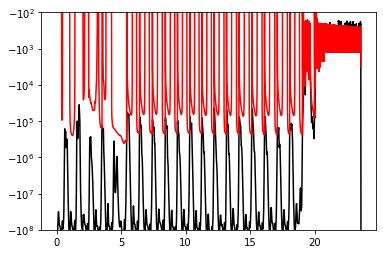

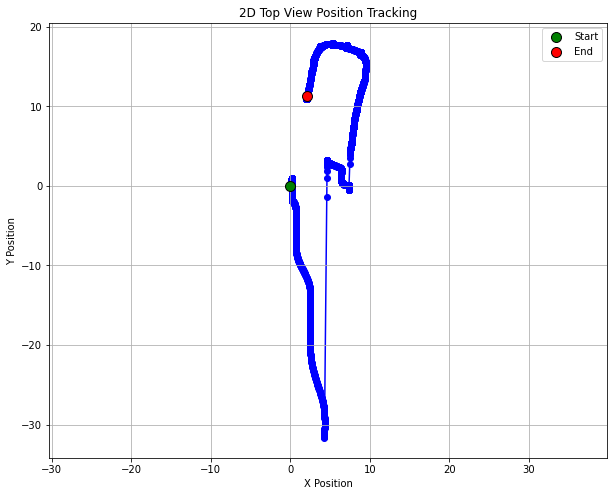

In [35]:
zupt , logL = ins.detector_adaptive(u2)
x_h, _, _, _ = ins.baseline2(u2, zupt, logL, True, x_h[:,-1], quat, P)
plot_position_tracking(x_h)

logL (1, 3900) gamma (3900,)


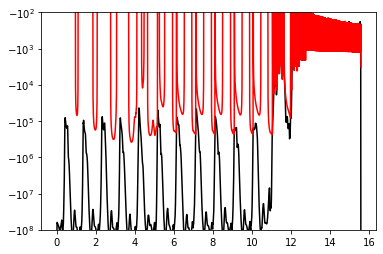

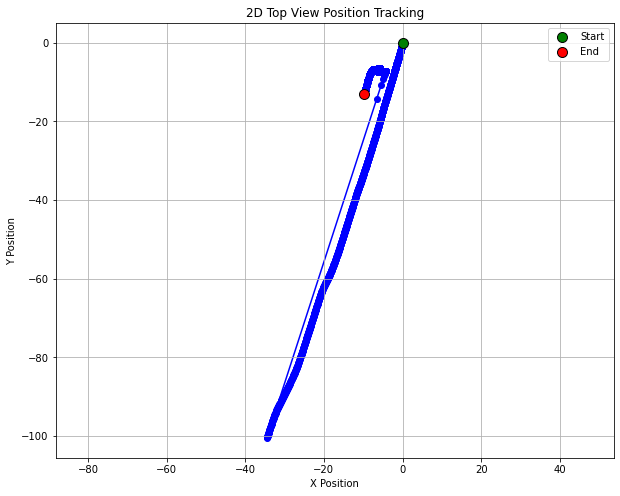

In [36]:
zupt , logL = ins.detector_adaptive(u3)
x_h, _, _, _ = ins.baseline2(u3, zupt, logL, True)
plot_position_tracking(x_h)

logL (1, 3900) gamma (3900,)


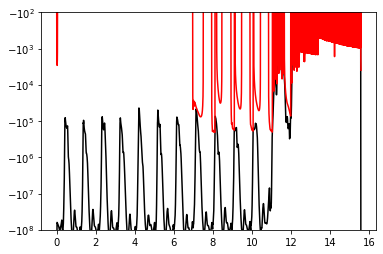

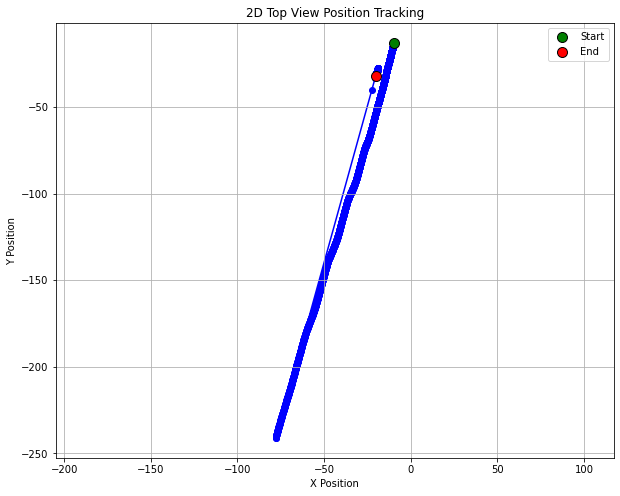

In [37]:
zupt , logL = ins.detector_adaptive(u3)
x_h, _, _, _ = ins.baseline2(u3, zupt, logL, True, x_h[:,-1], quat, P)
plot_position_tracking(x_h)

logL (1, 500) gamma (500,)


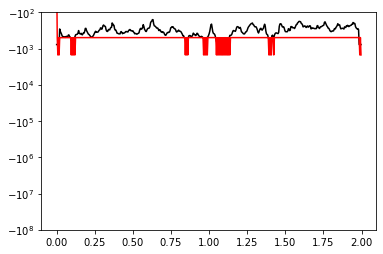

logL (1, 500) gamma (500,)


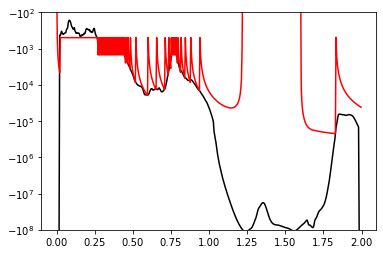

logL (1, 500) gamma (500,)


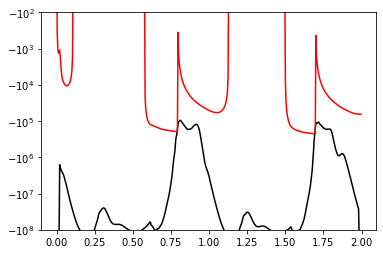

logL (1, 500) gamma (500,)


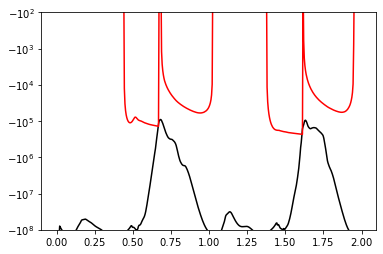

logL (1, 500) gamma (500,)


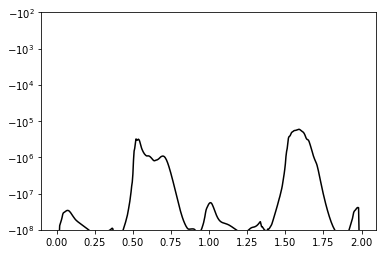

logL (1, 500) gamma (500,)


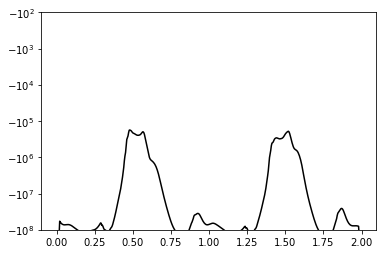

logL (1, 500) gamma (500,)


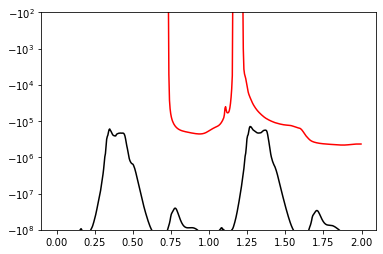

logL (1, 500) gamma (500,)


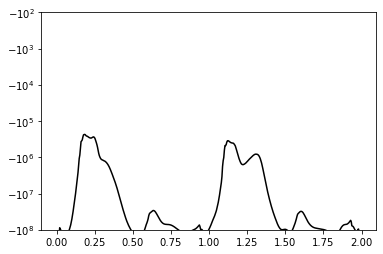

logL (1, 500) gamma (500,)


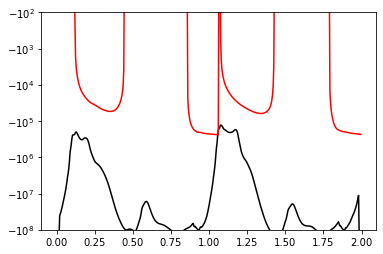

logL (1, 500) gamma (500,)


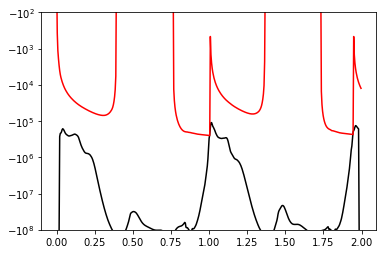

logL (1, 500) gamma (500,)


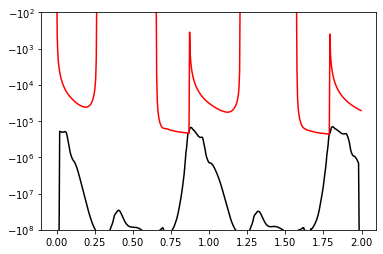

logL (1, 500) gamma (500,)


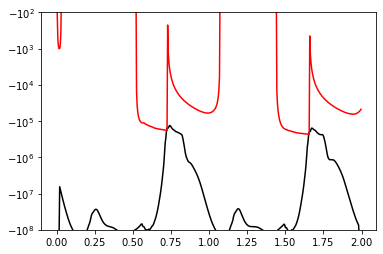

logL (1, 500) gamma (500,)


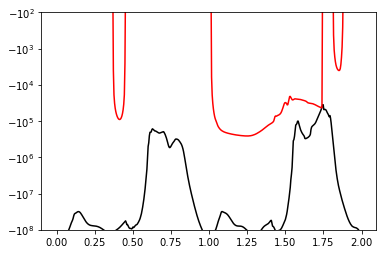

logL (1, 500) gamma (500,)


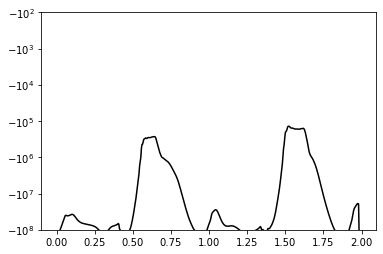

logL (1, 500) gamma (500,)


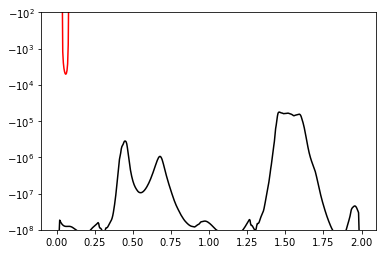

logL (1, 500) gamma (500,)


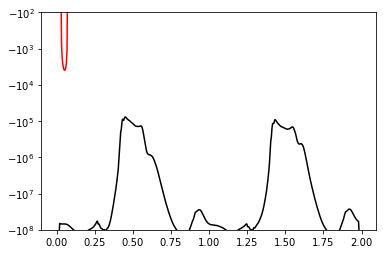

logL (1, 500) gamma (500,)


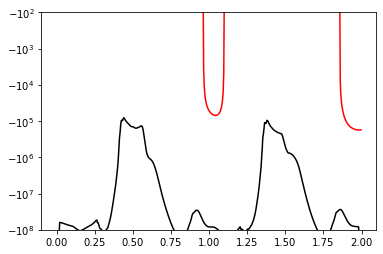

logL (1, 500) gamma (500,)


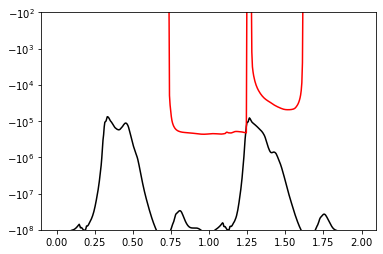

logL (1, 500) gamma (500,)


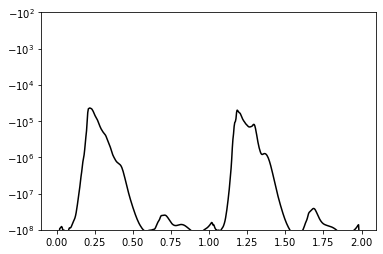

logL (1, 500) gamma (500,)


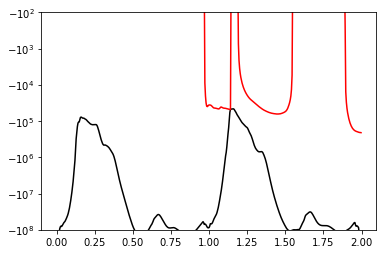

logL (1, 500) gamma (500,)


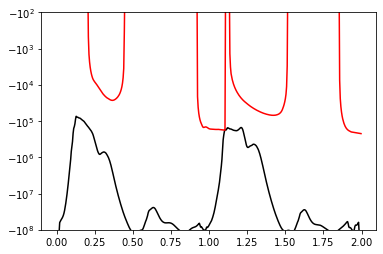

logL (1, 500) gamma (500,)


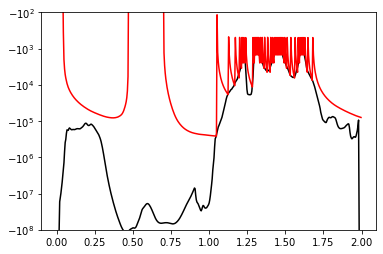

logL (1, 500) gamma (500,)


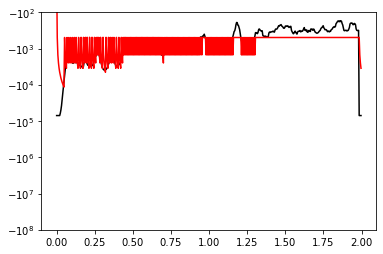

logL (1, 400) gamma (400,)


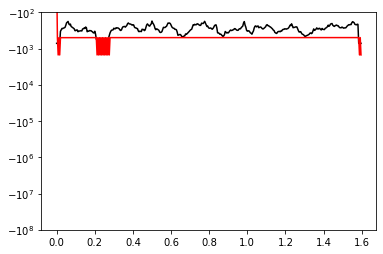

In [38]:
positions = None
n = 500
num_batches = len(u[0]) // n
positions = None
current_pos = None
for i in range(num_batches+1):
    # print(i)
    ui = u[:, i*n:(i+1)*n]
    zupt , logL = ins.detector_adaptive(ui)
    x_h, _, quat, P = ins.baseline2(ui, zupt, logL, True) # 9, N
    if current_pos is not None:
        x_h += current_pos.reshape(-1,1)
    else:
        current_pos = x_h[:, -1]
    if positions is None:
        positions = x_h
    positions = np.hstack((positions,x_h))
    

In [39]:
positions.shape

(9, 12400)

In [40]:
x = 1